In [0]:
# Importing keras
import keras

Using TensorFlow backend.


In [0]:
# Check Your GPU device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# Connect to your google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Change Your Working Directory to Your Google Drive
import os
os.chdir('/content/drive/My Drive')

In [0]:
# After you upload the zipped file, you can unzip the file to obtain the images
!unzip -o -q chest_xray.zip

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [0]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 6 - Flattening
classifier.add(Flatten())

""" New Layer: Dropout """
classifier.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier.add(Dense(units = 3, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier.summary()

classifier.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25088)            

Found 5232 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


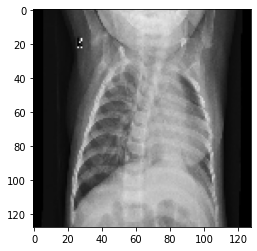

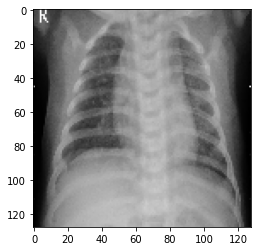

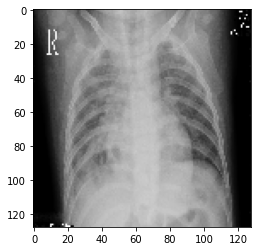

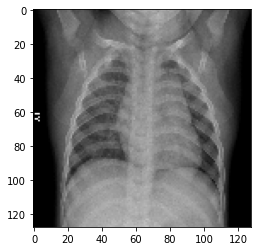

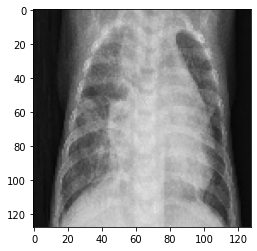

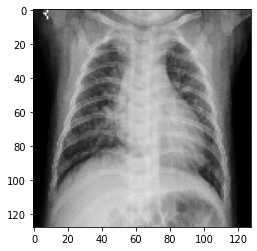

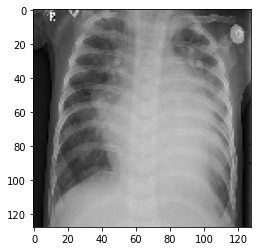

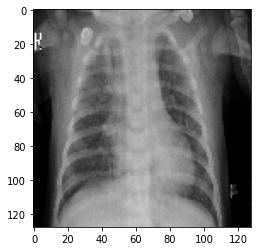

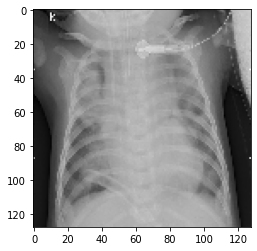

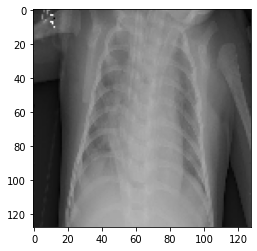

Epoch 1/5
5000/5000 [==============================] - 2359s 472ms/step - loss: 0.6321 - accuracy: 0.7259 - val_loss: 0.3717 - val_accuracy: 0.8429
Epoch 2/5
5000/5000 [==============================] - 2317s 463ms/step - loss: 0.5110 - accuracy: 0.7828 - val_loss: 0.3691 - val_accuracy: 0.8590
Epoch 3/5
5000/5000 [==============================] - 2335s 467ms/step - loss: 0.4789 - accuracy: 0.7959 - val_loss: 0.3600 - val_accuracy: 0.8157
Epoch 4/5
5000/5000 [==============================] - 2327s 465ms/step - loss: 0.4596 - accuracy: 0.8042 - val_loss: 0.4881 - val_accuracy: 0.8590
Epoch 5/5
5000/5000 [==============================] - 2378s 476ms/step - loss: 0.4459 - accuracy: 0.8079 - val_loss: 0.3410 - val_accuracy: 0.8574


In [0]:
# In[38]:
# Let's train our network using data augmentation and dropout:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'chest_xray/train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'chest_xray/test',
      target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


from matplotlib import pyplot as plt
x,y = training_set.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.show()


history = classifier.fit_generator(train_generator,
      steps_per_epoch=5000,
      epochs=5,
      validation_data=test_generator,
      validation_steps=600)




In [0]:
# Let's save our model -- we will be using it in the section on convnet visualization.
classifier.save('FinalProject.hdf5')

# save training history to another file
import pickle 
filehandler = open('history_improvement.pkl', 'wb') 
pickle.dump(history, filehandler)

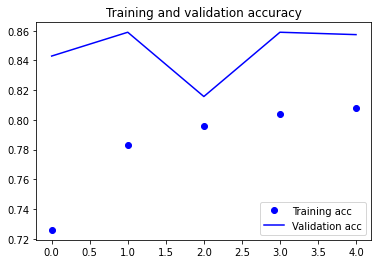

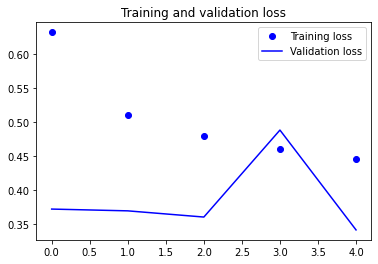

In [0]:
# Let's plot our results again:
import pickle
with open('history_improvement.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()